In [47]:
import os
import pandas as pd
import matplotlib_inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1.0 Data Importation and Preparation

In [48]:
mat_file_path = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\data-analysis\student-performance\student-performance-analysis\files\student-mat.csv"
por_file_path = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\data-analysis\student-performance\student-performance-analysis\files\student-por.csv"

In [49]:
df1 = pd.read_csv(mat_file_path, sep=";")
df2 = pd.read_csv(por_file_path, sep=";")

In [50]:
df1.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [51]:
df2.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel fre

#####   1.1 Add a column to distinguish each course (Mathematics & Portuguese)

In [52]:
df1['subject'] = 'Math'
df2['subject'] = 'Portuguese'

##### 1.2 Concatenate the two subject's dataframe

In [53]:
df_all = pd.concat([df1, df2], axis=0, ignore_index=True)

In [54]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Categorize Variables
Classify features as:
- Binary: e.g., sex, address, internet — map to 0/1
- Ordinal: e.g., Medu, Fedu, studytime — keep as is (integers)
- Nominal: e.g., Mjob, Fjob, guardian — apply one-hot encoding

In [67]:
# Binary mapping
binary_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
               'activities', 'nursery', 'higher', 'internet', 'romantic']
df_all[binary_cols] = df_all[binary_cols].replace({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0,
                                            'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-hot encode nominal features
df_all = pd.get_dummies(df_all, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)


C:\Users\dolap\AppData\Local\Temp\ipykernel_30304\573149973.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all[binary_cols] = df_all[binary_cols].replace({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0,


In [68]:
df_all

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,GP,0,18,1,1,0,4,4,2,2,...,False,False,False,False,True,False,False,False,True,False
1,GP,0,17,1,1,1,1,1,1,2,...,False,False,True,False,False,False,False,False,False,False
2,GP,0,15,1,0,1,1,1,1,2,...,False,False,True,False,False,False,True,False,True,False
3,GP,0,15,1,1,1,4,2,1,3,...,False,False,False,True,False,True,False,False,True,False
4,GP,0,16,1,1,1,3,3,1,2,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,0,19,0,1,1,2,3,1,3,...,False,False,True,False,False,False,False,False,True,False
1040,MS,0,18,1,0,1,3,1,1,2,...,True,False,False,True,False,False,False,False,True,False
1041,MS,0,18,1,1,1,1,1,2,2,...,False,False,True,False,False,False,False,False,True,False
1042,MS,1,17,1,0,1,3,1,2,1,...,False,False,False,True,False,False,False,False,True,False


In [69]:
# Checking for any missing values
print("Missing values:\n", df_all.isnull().sum())


Missing values:
 school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
subject              0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other   

2. Enhance EDA
a. Distribution & Relationship Visuals
Boxplots of G3 for binary features (e.g., romantic, internet)

Bar plots for categorical mean comparisons (e.g., Mjob, guardian)

Correlation heatmap including studytime, failures, Medu, Fedu, etc.

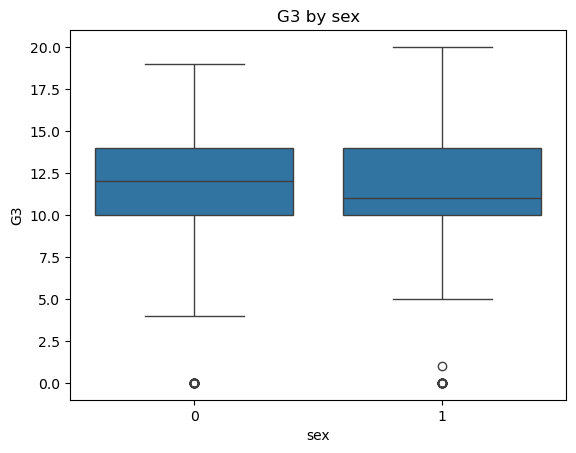

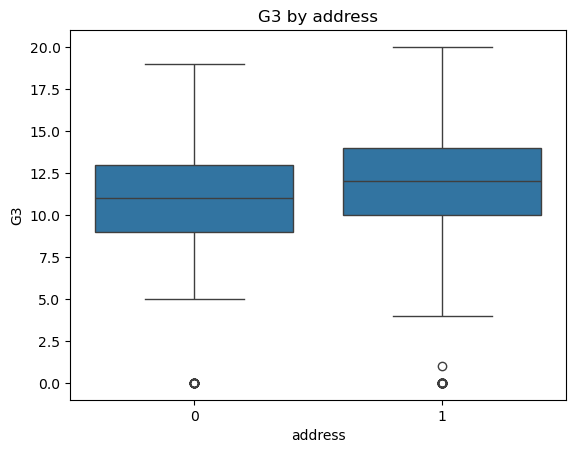

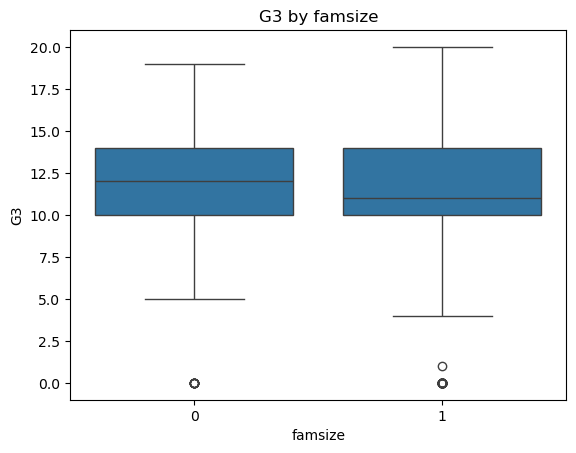

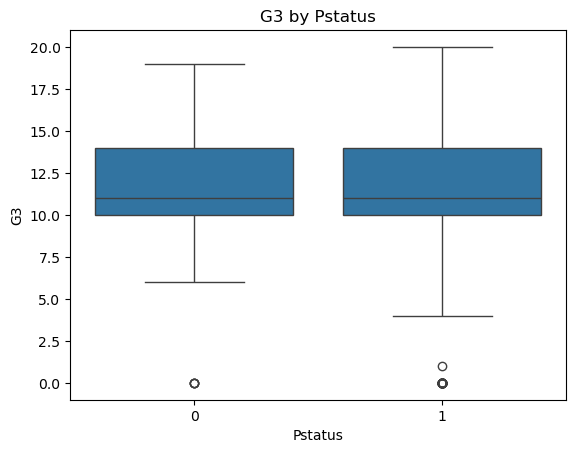

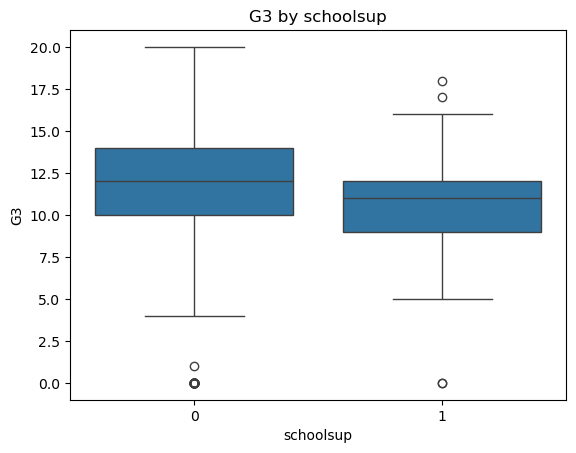

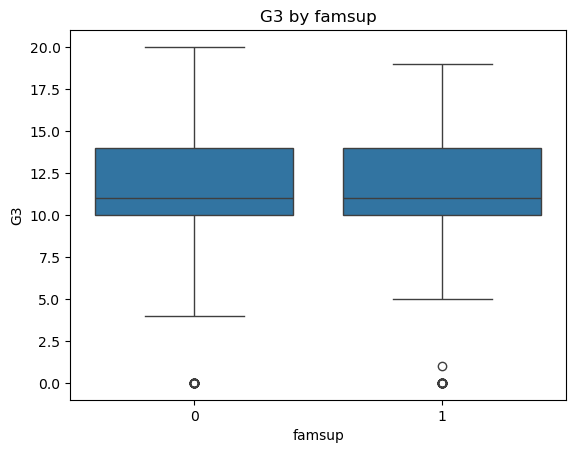

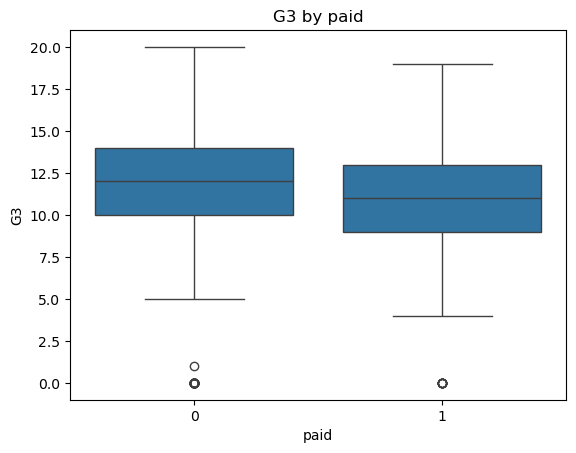

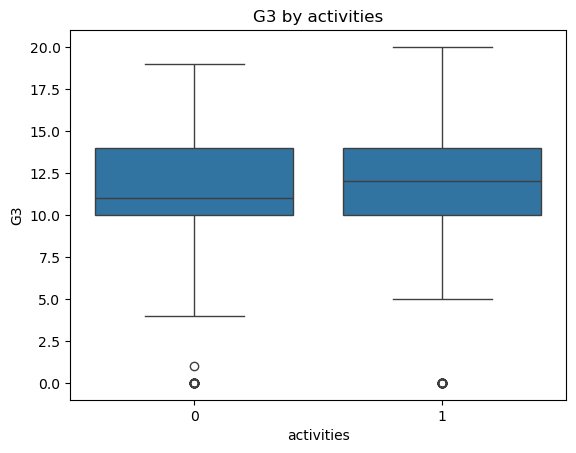

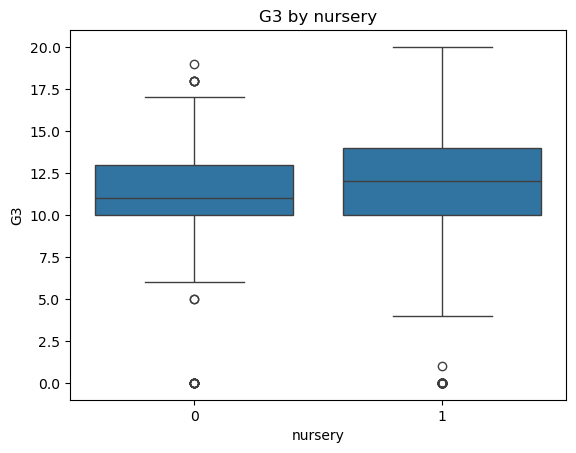

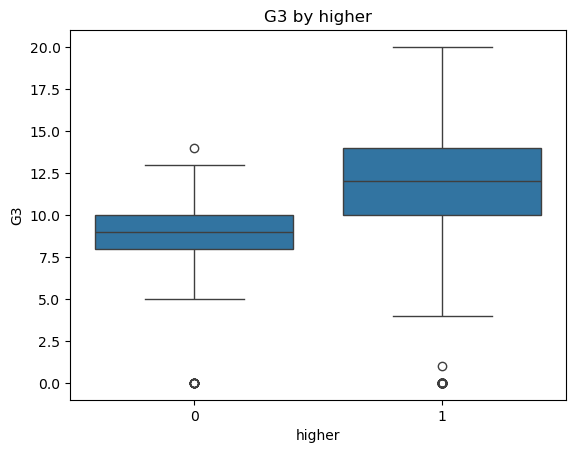

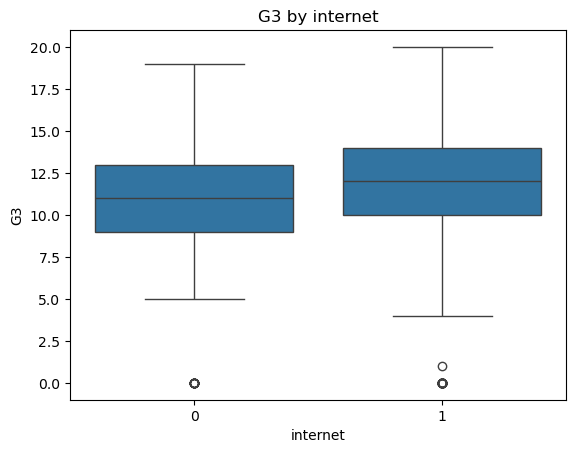

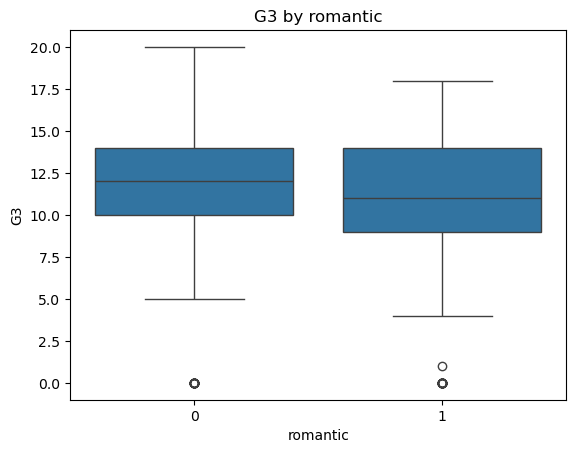

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in binary_cols:
    sns.boxplot(x=col, y='G3', data=df_all)
    plt.title(f'G3 by {col}')
    plt.show()


##### 1.3 Convert categorical columns to numerical values

In [ ]:

# df_all['sex'] = df_all['sex'].map({'F': 0, 'M': 1})
# df_all['address'] = df_all['address'].map({'U': 1, 'R': 0})

In [72]:
# Examining the correlations between G3 and other numerical features.
correlation = df_all.corr(numeric_only=True)['G3'].sort_values(ascending=False)
print("Top correlations with G3:\n", correlation)


Top correlations with G3:
 G3                   1.000000
G2                   0.910743
G1                   0.809142
higher               0.236578
Medu                 0.201472
studytime            0.161629
Fedu                 0.159796
reason_reputation    0.121303
address              0.117696
internet             0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
Mjob_teacher         0.084521
famrel               0.054461
Mjob_services        0.045015
Fjob_health          0.042101
nursery              0.039950
activities           0.033998
famsup               0.013313
guardian_mother      0.009746
reason_home          0.003895
Fjob_other          -0.023825
Pstatus             -0.030693
sex                 -0.031472
Fjob_services       -0.035273
reason_other        -0.043097
absences            -0.045671
paid                -0.049388
famsize             -0.061209
freetime            -0.064890
Mjob_other          -0.066051
schoolsup           -0.079346
health       

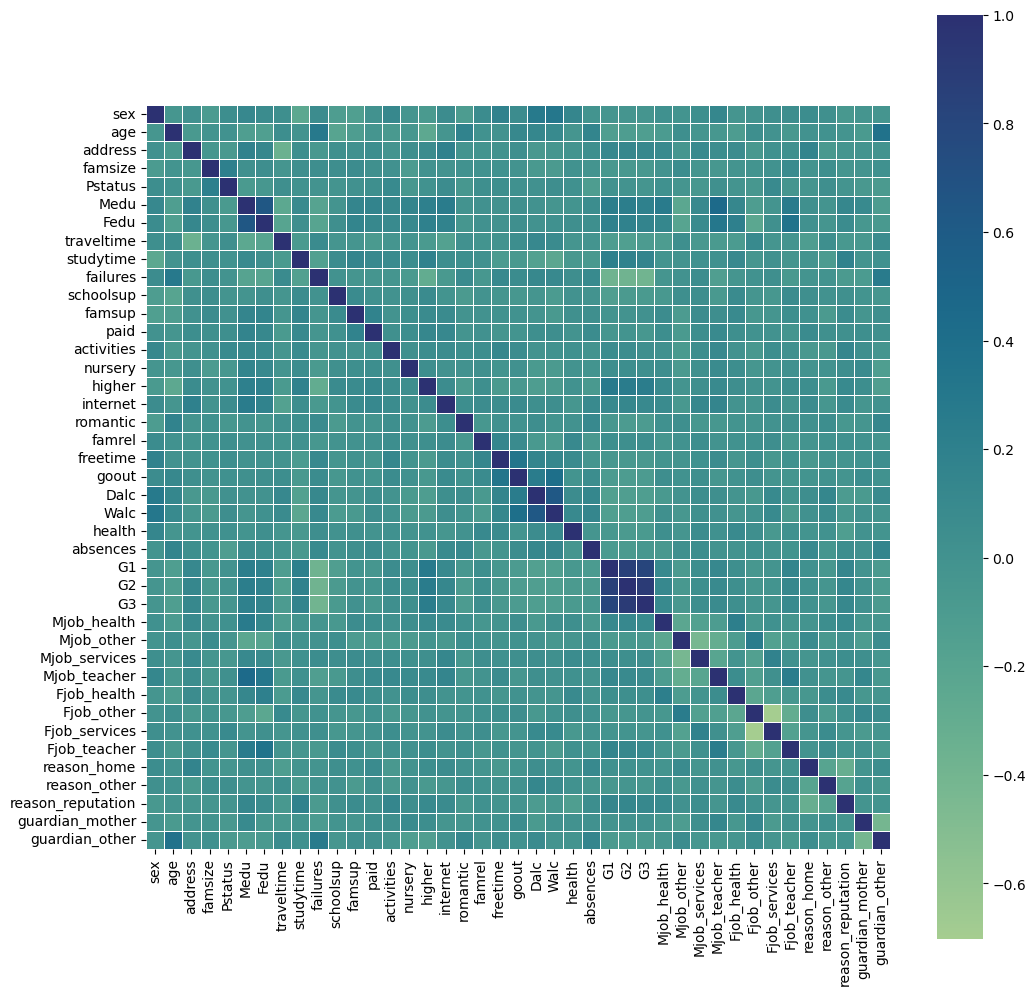

In [74]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_all.corr(numeric_only=True), cmap='crest', linewidths=0.5, cbar=True, square=True)
plt.show()

##### These grades are related with the course subject, Math or Portuguese:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [60]:
# Group analysis
print(df_all.groupby('sex')['G3'].mean())  # Performance by gender
print(df_all.groupby('studytime')['G3'].mean())  # Performance by study time

sex
0    11.448393
1    11.203091
Name: G3, dtype: float64
studytime
1    10.580442
2    11.335984
3    12.493827
4    12.274194
Name: G3, dtype: float64


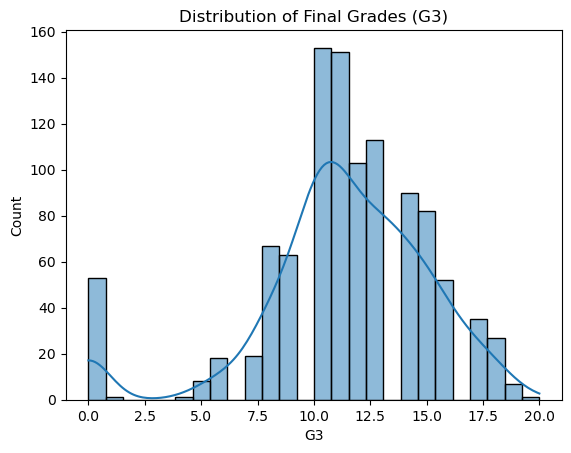

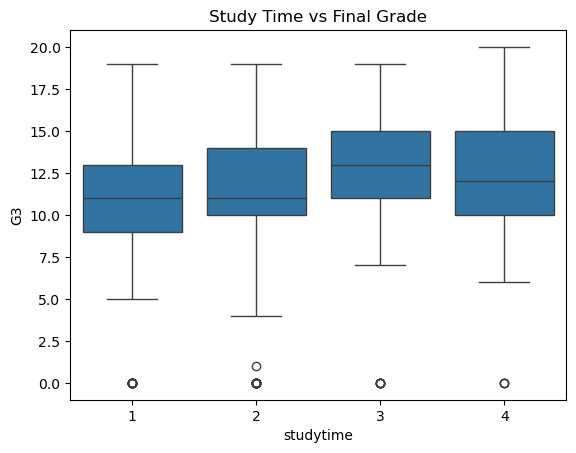

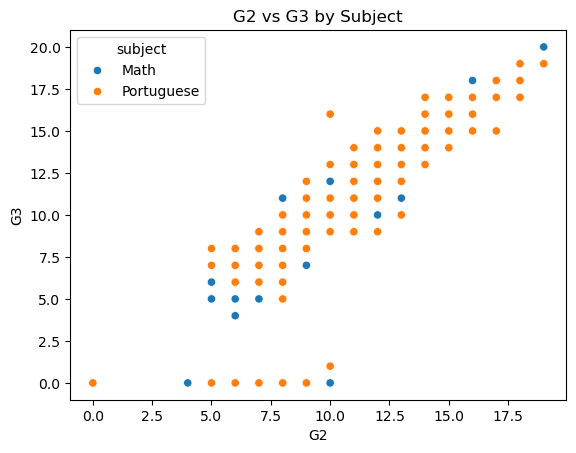

In [61]:
# Histogram of G3
sns.histplot(df_all['G3'], kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.show()

# Boxplot of study time vs G3
sns.boxplot(data=df_all, x='studytime', y='G3')
plt.title('Study Time vs Final Grade')
plt.show()

# Scatter: G1 and G2 vs G3
sns.scatterplot(data=df_all, x='G2', y='G3', hue='subject')
plt.title('G2 vs G3 by Subject')
plt.show()


#### Regression Model

Now that you’ve encoded all meaningful variables:

a. Feature Selection:
Use ```SelectKBest``` or similar techniques to choose top predictors:

In [76]:
from sklearn.feature_selection import SelectKBest, f_regression
# Ensure all columns in X are numerical
X = df_all.drop(['G1', 'G2', 'G3'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical
y = df_all['G3']

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [79]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)


R²: 0.11854606899734077
RMSE: 3.6916119762321133


In [65]:
# Predict
y_pred = model.predict(X_test)


In [66]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1.73
R²: 0.81


##### Summary of Expected Outputs
| **Task**         | **Output**                                                                 |
|------------------|-----------------------------------------------------------------------------|
| Data Cleaning    | No major missing values; datasets merged with subject label                |
| EDA              | G1, G2, failures, and studytime show strong influence on G3                 |
| Visualizations   | Clear relationships between prior grades, study habits, and G3              |
| Model            | Linear regression gives solid baseline (R² ~ 0.8+)                          |